### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajid Majeed
### Subject: Machine Learning
### Program: Data Science with Artificial Intelligence
### University: NED Academy
### Github:https://github.com/ambreenraheem?tab=overview&from=2024-09-01&to=2024-09-30
### Email: ambreen.a.raheem@outlook.com
### LinkedIn: https://www.linkedin.com/in/ambreen-abdul-raheem-122509300/

# **Regression with pyCaret Notebook**
## Introduction
- This notebook demonstrates how to use the `pycaret` library to perform regression analysis on a dataset. The dataset used in this notebook is the `Tips` dataset from the `seaborn` library.

In [6]:
# check installed version (must be >3.0)
!pip install pycaret

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset
# For demonstration, we'll use the 'tips' dataset from seaborn

In [8]:
data = sns.load_dataset('tips')

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Preprocessing: Encoding categorical variables

In [16]:
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['day'] = data['day'].astype('category').cat.codes
data['time'] = data['time'].astype('category').cat.codes

In [18]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


# Split the data into training and test sets

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the PyCaret regression setup without experiment logging

In [20]:
regression_setup = setup(
    data=train,
    target='tip',
    session_id=123,
    normalize=True,
    polynomial_features=True,
    remove_multicollinearity=True,
    log_experiment=False,  # Disable experiment logging
    experiment_name='tips_regression',
    verbose=False  # Suppress logs
)

# Models Name (almost 25 models)

In [21]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Compare models to find the best one

In [22]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7737,1.0485,1.0003,0.4007,0.2402,0.2948,0.0490
ridge,Ridge Regression,0.7765,1.0340,0.9920,0.3991,0.2429,0.2957,0.0430
lr,Linear Regression,0.7846,1.0503,0.9997,0.3874,0.2467,0.2998,0.7220
omp,Orthogonal Matching Pursuit,0.8021,1.1253,1.0340,0.3784,0.2461,0.3077,0.0420
huber,Huber Regressor,0.7799,1.0790,1.0048,0.3777,0.2442,0.2883,0.0570
lightgbm,Light Gradient Boosting Machine,0.7921,1.1320,1.0301,0.3627,0.2453,0.2998,0.2380
knn,K Neighbors Regressor,0.8152,1.1485,1.0585,0.3340,0.2599,0.3118,0.0480
rf,Random Forest Regressor,0.8248,1.2082,1.0746,0.3204,0.2599,0.3181,0.3240
ada,AdaBoost Regressor,0.8338,1.1792,1.0723,0.3069,0.2569,0.3289,0.1080
et,Extra Trees Regressor,0.8544,1.2615,1.0979,0.2969,0.2660,0.3298,0.1580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Comparison will test 19 Regression models

In [23]:
# Print the best model
print(best_model)

BayesianRidge()


# Tune the best model for better performance

In [24]:
 # Optimize for Mean Absolute Error
tuned_model = tune_model(best_model,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8682,1.1779,1.0853,0.1580,0.2753,0.3593
1,1.0865,1.9881,1.4100,0.1977,0.2911,0.2889
2,0.8878,1.0873,1.0428,0.2033,0.3102,0.4623
3,0.8857,1.3700,1.1705,0.0863,0.2691,0.3100
4,0.8113,1.0636,1.0313,0.2415,0.2792,0.3753
5,0.6730,0.8827,0.9395,0.5933,0.2017,0.2391
6,0.7520,0.9959,0.9980,0.4096,0.2215,0.2365
7,0.5685,0.5572,0.7465,0.6049,0.2159,0.2792
8,0.7221,0.9432,0.9712,0.7196,0.1850,0.1890


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Evaluate the tuned model

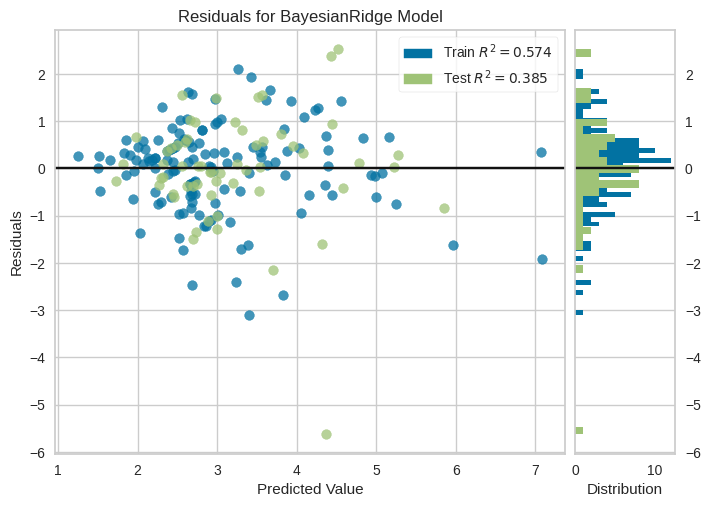

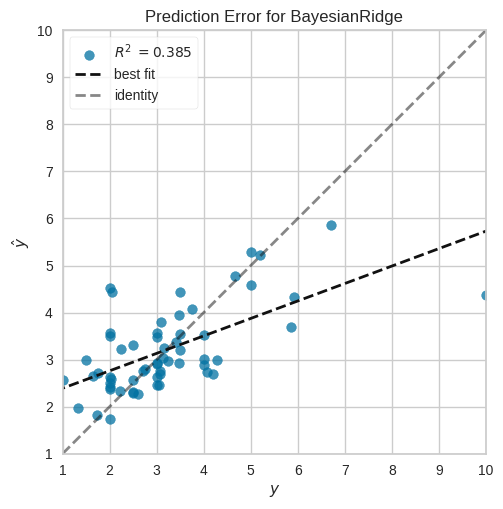

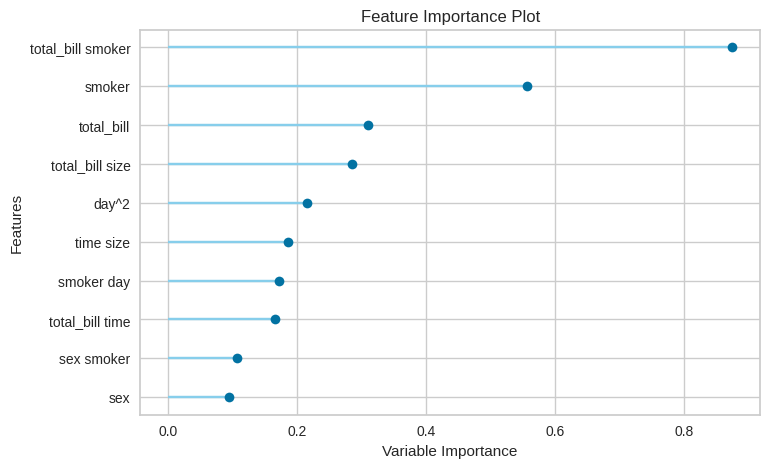

In [27]:
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='feature')


## Cooks Distance:

- Cook's distance is a measure that combines the influence of leverage and residual size. It is used to identify influential data points in a regression analysis. The Cook's distance is a measure of the influence of each individual observation on the regression coefficients. It is used to identify influential data points in a regression analysis. The Cook's distance is a measure of the influence of each individual observation on the regression coefficients.

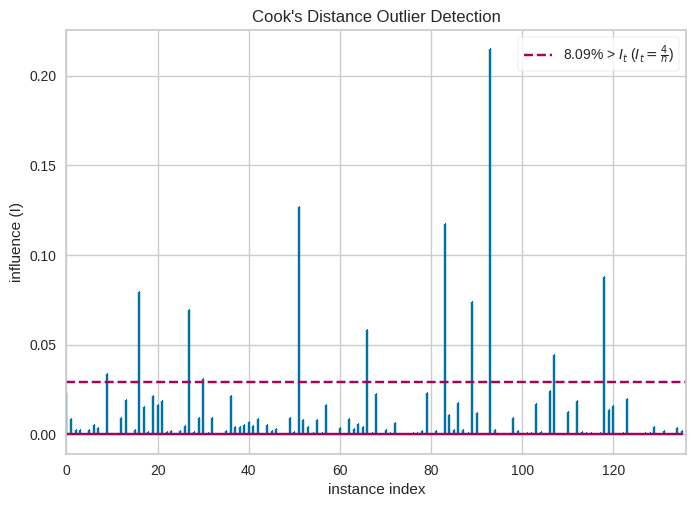

In [26]:
plot_model(tuned_model, plot='cooks')

# evaluate model for better understanding using pycaret

In [28]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Finalize the model for deployment

In [29]:
final_model = finalize_model(tuned_model)

# Predict on the test dataset

In [30]:
predictions = predict_model(final_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.7400,0.8974,0.9473,0.2821,0.2243,0.3031


# Evaluate performance

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Extract true and predicted values
true_values = test['tip']
# Verify the actual column name in predictions
print(predictions.columns)

# Replace 'Label' with the correct column name based on the output above
predicted_values = predictions['prediction_label']  # Update 'Label' if the column name is different

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size', 'tip',
       'prediction_label'],
      dtype='object')


# Calculate metrics

In [33]:
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.897368500145747
R-squared: 0.28208874264241746


# Save the model for later use

In [35]:
save_model(final_model, 'tips_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['total_bill', 'sex', 'smoker',
                                              'day', 'time', 'size'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  BayesianRidge(alpha_1=0.01, alpha_2=1e-07, lambda_1=0.05,
          

# Load the saved model (optional)

In [36]:
loaded_model = load_model('tips_regression_model')

Transformation Pipeline and Model Successfully Loaded


# Additional Analysis
# Plot actual vs predicted values

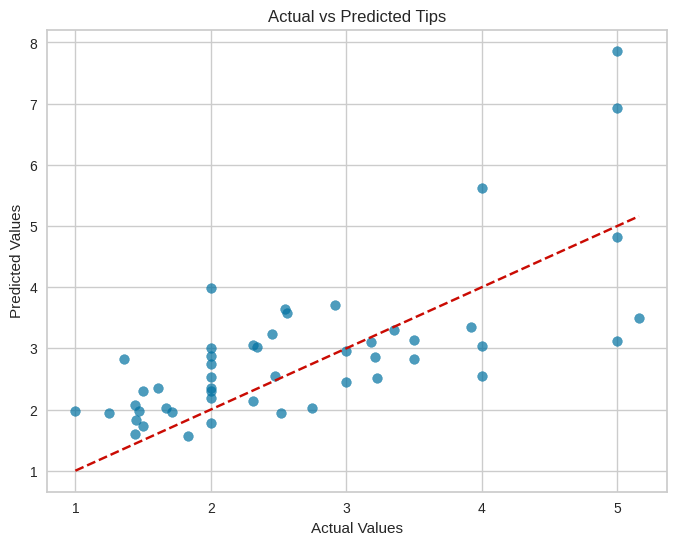

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(true_values, predicted_values, alpha=0.7)
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Tips')
plt.show()